In [2]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import trimesh


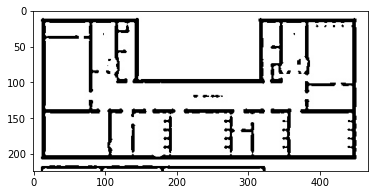

In [3]:

img=cv.imread("ocp.png")
plt.imshow(img)


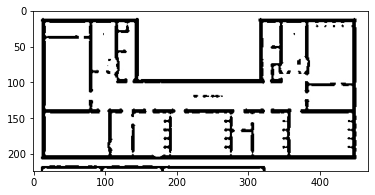

In [4]:

gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")


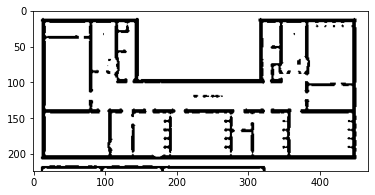

In [5]:

thresh=cv.threshold(gray, 120, 255, cv.THRESH_BINARY)[1]
plt.imshow (thresh, cmap="gray")


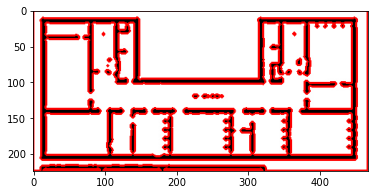

In [6]:

k = cv.findContours(thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
contours, hierarchy = cv.findContours(thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
exper=img.copy()
for i in range(len(hierarchy[0])):
    cv.drawContours(exper, contours[i], -1, (255, 0, 0), 2)

plt.imshow(exper)


In [7]:

lst=[]
a=np.array([1, 2, 0])
d=np.array([2, 3, 0])
b=np.array([1, 3, 0])
c=np.array([2, 2, 0])
lst=[a, b, c, d]
lst.extend([i+np.array([0, 0, 2]) for i in lst])
lst



[array([1, 2, 0]),
 array([1, 3, 0]),
 array([2, 2, 0]),
 array([2, 3, 0]),
 array([1, 2, 2]),
 array([1, 3, 2]),
 array([2, 2, 2]),
 array([2, 3, 2])]

In [8]:

fcs = np.array([[0, 2, 4],
                [4, 2, 6],
                [1, 2, 0],
                [3, 2, 1],
                [5, 0, 4],
                [1, 0, 5],
                [3, 7, 2],
                [7, 6, 2],
                [7, 4, 6],
                [5, 4, 7],
                [1, 5, 3],
                [7, 3, 5]], dtype=np.uint8)
fcs


array([[0, 2, 4],
       [4, 2, 6],
       [1, 2, 0],
       [3, 2, 1],
       [5, 0, 4],
       [1, 0, 5],
       [3, 7, 2],
       [7, 6, 2],
       [7, 4, 6],
       [5, 4, 7],
       [1, 5, 3],
       [7, 3, 5]], dtype=uint8)

In [9]:

mesh=trimesh.Trimesh(vertices=lst, faces=fcs)


In [20]:

mesh.export("./map.stl")


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00\x00@\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x00\x00\x80\x00\x00\x00\x80\x00\x00\x80\xbf\x00\x00\x80?\x00\x00@@\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x80\x00\x00\x80\xbf\x00\x00\x00@\x00\x00@@\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00@\x00\x00\x00\x0

In [12]:

a=np.vstack(contours)
b=[c[0] for c in a]


In [11]:

corner_idxs = [i for i in range(len(contours)) if hierarchy[0][i][3] == -1]
lst=[contours[i] for i in corner_idxs]
contours[5][0][0]


array([348, 153], dtype=int32)